C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\shap\utils\_clustering.py:35: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def _pt_shuffle_rec(i, indexes, index_mask, partition_tree, M, pos):
C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\shap\utils\_clustering.py:54: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://

1190
2390
3590
5390
5990
6590
7190
9590
10790
11990
13190
13790
14390
14990
16190
17390
18590
19790
20990
22190
23390
24590
25790
26990
28190
29390
30590
31790
32990
34190
35390
36590
37790
40110
40120
41310
41320
42510
42520
44910
44920
46110
46120
47310
47320
48340
49540
50740
51940
53740
54340
56740
57940
59140
61540
62740
63940
65140
66340
67540
68740
69940
71140
72340
73540
74140
74740
75940
77140
78340
79540
80740
81940
83140
84340
86740
87940
89140
90340
92740
93940
95140
96340
97540
98740
99940
101140
104140
104740
105940
107140
108340
110140
111340
111940
114940
116140
117340
119140
122140
123340
124540
126340
126940
127540
128140
129340
130540
132340
134740
135940
136540
141840
141850
145580
145590
152740
153940
155140
156340
156940
157540
158140
STARTING create_training_data_NN
4860
11330
11340
18070
18080
23020
23030
23480
23490
23910
23920
26640
26660
26700
26710
26730
26740
26750
26820
26830
27710
27720
29740
29750
29980
29990
30720
30730
30770
30780
31570
31580
32010
320

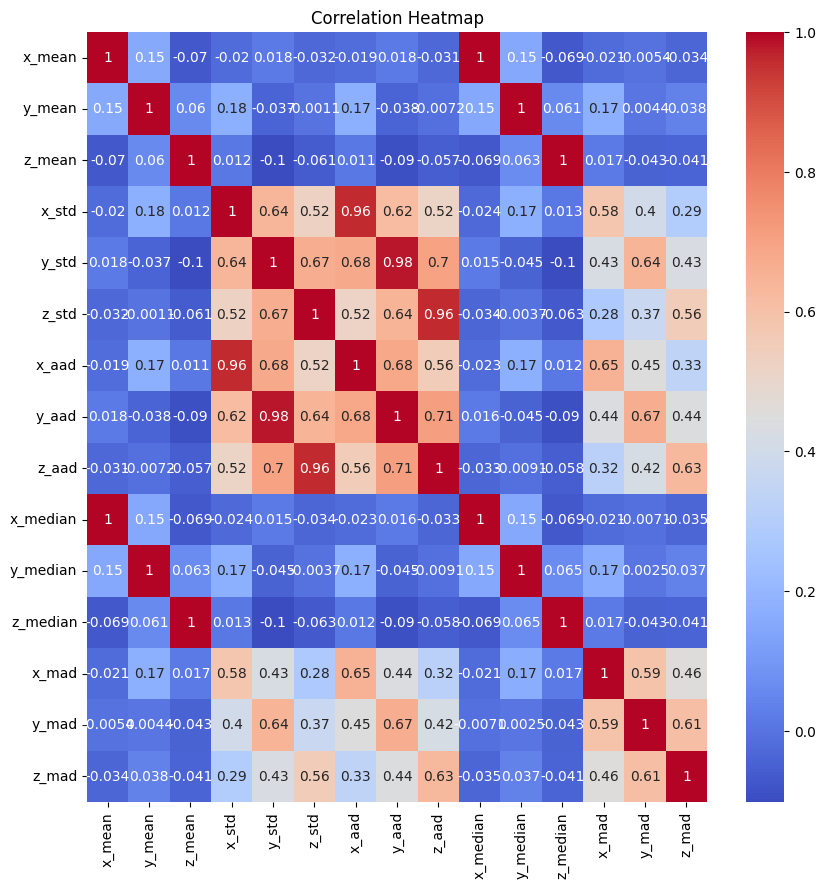

In [1]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import multilabel_confusion_matrix, precision_score, recall_score, f1_score
import numpy as np
from sklearn.linear_model import Perceptron
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import time
from sklearn import svm, datasets
from sklearn.svm import SVC
from sklearn import preprocessing
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from scipy.signal import find_peaks
import warnings
import array as arr
import shap
import os
from util import create_training_data, calculate_accelerometer_features, calculate_accelerometer_fft_features, create_training_data_NN, getCorr
from model import LRmodel, RFmodel, SVMmodel, GradientBoostingModel, NeuralNetworkModel
import joblib
import glob
import os
import cv2

# Change the current directory to the directory where the code is saved
os.chdir('./input_kichban')
np.bool = np.bool_
np.int = np.int_


data = pd.read_csv('totalData2.csv')
#  data test
data_test = pd.read_csv('new_nam.csv')

data['createdAt'] = data['createdAt'].str[:-38]
data_test['createdAt'] = data_test['createdAt'].str[:-38]


x_list, y_list, z_list, train_labels = create_training_data(
    data=data, window_size=20, step_size=10)
total_list_NN, train_labels_NN = create_training_data_NN(data=data)

# test
x_list_test, y_list_test, z_list_test, train_labels_test = create_training_data(
    data=data_test, window_size=20, step_size=10)
total_list_NN_test, train_labels_NN_test = create_training_data_NN(
    data=data_test)


features = calculate_accelerometer_features(
    x_list=x_list, y_list=y_list, z_list=z_list, window_size=20)
# test
features_test = calculate_accelerometer_features(
    x_list=x_list_test, y_list=y_list_test, z_list=z_list_test, window_size=20)

print("features", len(features))

# print("features", features[800])


features_fft = calculate_accelerometer_fft_features(
    x_list=x_list, y_list=y_list, z_list=z_list, window_size=10)
# test
features_fft_test = calculate_accelerometer_fft_features(
    x_list=x_list_test, y_list=y_list_test, z_list=z_list_test, window_size=10)


print("features", features_fft.head())


features = features[['x_mean', 'y_mean', 'z_mean', 'x_std', 'y_std', 'z_std', 'x_aad',
                     'y_aad', 'z_aad', 'x_median', 'y_median', 'z_median', 'x_mad', 'y_mad', 'z_mad', 'x_IQR', 'y_IQR',
                     'z_IQR', 'x_neg_count', 'y_neg_count', 'z_neg_count', 'x_pos_count',
                     'y_pos_count', 'z_pos_count', 'x_above_mean', 'y_above_mean', 'z_above_mean', 'x_peak_count', 'y_peak_count', 'z_peak_count',
                     'x_skewness', 'y_skewness', 'z_skewness', 'x_kurtosis', 'y_kurtosis',
                     'z_kurtosis', 'x_energy', 'y_energy', 'z_energy', 'avg_result_accl',
                     'sma']]

features_fft = features_fft[['x_mean_fft', 'y_mean_fft', 'z_mean_fft', 'x_min_fft',
                             'y_min_fft', 'z_min_fft', 'x_maxmin_diff_fft', 'y_maxmin_diff_fft', 'z_maxmin_diff_fft',
                             'x_median_fft', 'y_median_fft', 'z_median_fft', 'x_IQR_fft', 'y_IQR_fft', 'z_IQR_fft', 'x_above_mean_fft', 'y_above_mean_fft', 'z_above_mean_fft',
                             'x_peak_count_fft', 'y_peak_count_fft', 'z_peak_count_fft',
                             'x_kurtosis_fft', 'y_kurtosis_fft', 'z_kurtosis_fft', 'x_energy_fft', 'y_energy_fft',
                             'z_energy_fft', 'avg_result_accl_fft', 'sma_fft']]

tran_corr = getCorr(features, ['x_mean', 'y_mean', 'z_mean', 'x_std', 'y_std', 'z_std', 'x_aad',
                               'y_aad', 'z_aad', "x_median", 'y_median', 'z_median', 'x_mad', 'y_mad', 'z_mad'])


features = features[['x_mean', 'y_mean', 'z_mean', 'x_std', 'y_std', 'z_std', 'x_aad',
                     'y_aad', 'z_aad', 'x_median', 'y_median', 'z_median', 'x_mad', 'y_mad', 'z_mad', 'x_IQR', 'y_IQR',
                     'z_IQR', 'x_neg_count', 'y_neg_count', 'z_neg_count', 'x_pos_count',
                     'y_pos_count', 'z_pos_count', 'x_above_mean', 'y_above_mean', 'z_above_mean', 'x_peak_count', 'y_peak_count', 'z_peak_count',
                     'x_skewness', 'y_skewness', 'z_skewness', 'x_kurtosis', 'y_kurtosis',
                     'z_kurtosis', 'x_energy', 'y_energy', 'z_energy', 'avg_result_accl',
                     'sma']]

features_test = features_test[['x_mean', 'y_mean', 'z_mean', 'x_std', 'y_std', 'z_std', 'x_aad',
                     'y_aad', 'z_aad', 'x_median', 'y_median', 'z_median', 'x_mad', 'y_mad', 'z_mad', 'x_IQR', 'y_IQR',
                     'z_IQR', 'x_neg_count', 'y_neg_count', 'z_neg_count', 'x_pos_count',
                     'y_pos_count', 'z_pos_count', 'x_above_mean', 'y_above_mean', 'z_above_mean', 'x_peak_count', 'y_peak_count', 'z_peak_count',
                     'x_skewness', 'y_skewness', 'z_skewness', 'x_kurtosis', 'y_kurtosis',
                     'z_kurtosis', 'x_energy', 'y_energy', 'z_energy', 'avg_result_accl',
                     'sma']]

features_fft_test = features_fft_test[['x_mean_fft', 'y_mean_fft', 'z_mean_fft', 'x_min_fft',
                             'y_min_fft', 'z_min_fft', 'x_maxmin_diff_fft', 'y_maxmin_diff_fft', 'z_maxmin_diff_fft',
                             'x_median_fft', 'y_median_fft', 'z_median_fft', 'x_IQR_fft', 'y_IQR_fft', 'z_IQR_fft', 'x_above_mean_fft', 'y_above_mean_fft', 'z_above_mean_fft',
                             'x_peak_count_fft', 'y_peak_count_fft', 'z_peak_count_fft',
                             'x_kurtosis_fft', 'y_kurtosis_fft', 'z_kurtosis_fft', 'x_energy_fft', 'y_energy_fft',
                             'z_energy_fft', 'avg_result_accl_fft', 'sma_fft']]



features_all (15750, 29)
158748
158748
training time LRmodel complexity : 0.004389286041259766 s


lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Accuracy: 0.3458385876418663

 -------------Classification LogisticRegression Report-------------

              precision    recall  f1-score   support

           1       0.50      0.51      0.51      2872
           2       0.15      0.27      0.19       805
           3       0.42      0.20      0.27      2426
           4       0.02      0.05      0.02       241

    accuracy                           0.35      6344
   macro avg       0.27      0.26      0.25      6344
weighted avg       0.41      0.35      0.36      6344

[[1478  676  314  404]
 [ 220  220  295   70]
 [1140  560  485  241]
 [ 133   49   48   11]]


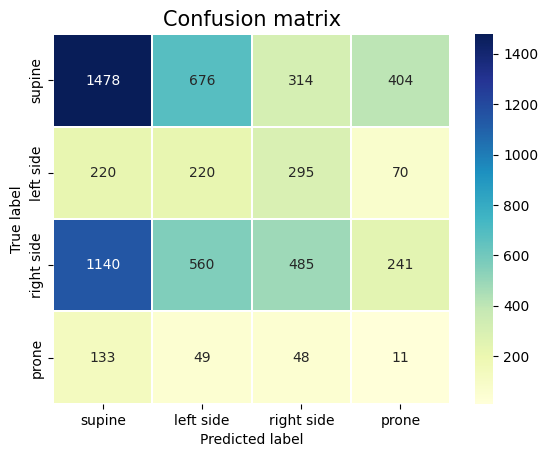

training time complexity : 3.7934727668762207 s
Accuracy: 0.4235498108448928

 -------------Classification RandomForestClassifier Report-------------

              precision    recall  f1-score   support

           1       0.83      0.35      0.49      2872
           2       0.23      0.49      0.31       805
           3       0.44      0.50      0.47      2426
           4       0.13      0.37      0.19       241

    accuracy                           0.42      6344
   macro avg       0.41      0.43      0.37      6344
weighted avg       0.58      0.42      0.45      6344

[[ 991  523 1050  308]
 [   2  394  402    7]
 [ 197  727 1213  289]
 [   9   70   73   89]]


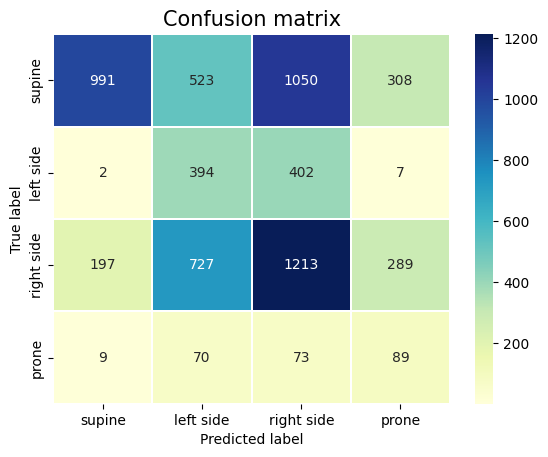

training time complexity : 6.180180549621582 s
Accuracy: 0.15952080706179067

 -------------Classification SVM Report-------------

              precision    recall  f1-score   support

           1       0.70      0.21      0.32      2872
           2       0.22      0.11      0.14       805
           3       0.24      0.05      0.08      2426
           4       0.05      0.88      0.09       241

    accuracy                           0.16      6344
   macro avg       0.30      0.31      0.16      6344
weighted avg       0.43      0.16      0.20      6344

[[ 597  142  329 1804]
 [  20   87   37  661]
 [ 229  166  116 1915]
 [  11    7   11  212]]


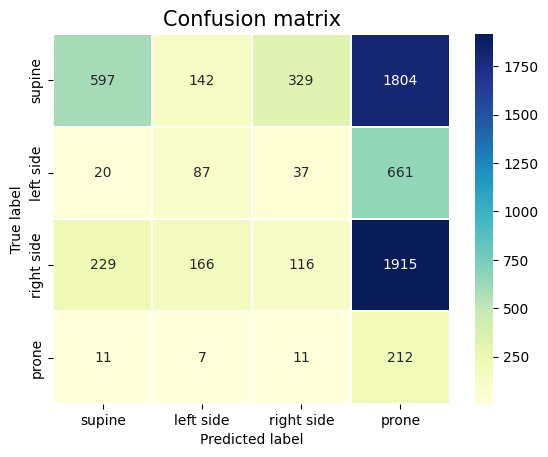

Training time complexity: 7.979074954986572 s
Accuracy: 0.5474464060529635

 -------------Classification Gradient Boosting Report-------------

              precision    recall  f1-score   support

           1       0.77      0.62      0.68      2872
           2       0.12      0.09      0.10       805
           3       0.49      0.66      0.56      2426
           4       0.25      0.14      0.18       241

    accuracy                           0.55      6344
   macro avg       0.41      0.38      0.38      6344
weighted avg       0.56      0.55      0.54      6344

[[1773  235  837   27]
 [  12   74  716    3]
 [ 494  267 1592   73]
 [  32   52  123   34]]


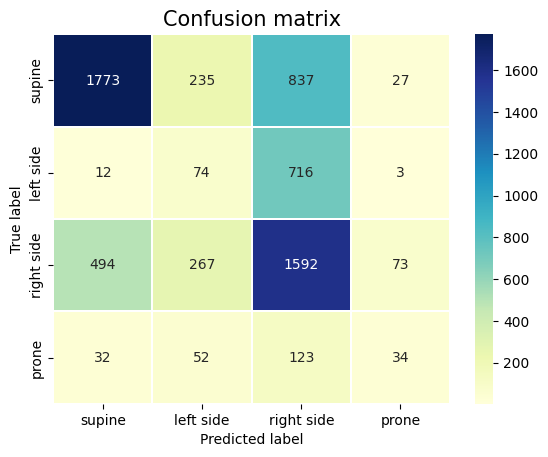

['fullFD_gbM.dat']

In [2]:
features_all = pd.concat([features_fft], axis=1)
features_all_test = pd.concat([features_fft_test], axis=1)


print("features_all", features_all.shape)
# train, test, labelTrain, labelTest = train_test_split(
#     features_all, train_labels, test_size=0.25, random_state=1)

# trainNN, testNN, labelTrainNN, labelTestNN = train_test_split(
#     total_list_NN, train_labels_NN, test_size=0.25, random_state=1)

train = features_all
test = features_all_test
labelTrain = train_labels
labelTest = train_labels_test
trainNN = total_list_NN
testNN = total_list_NN_test
labelTrainNN = train_labels_NN
labelTestNN = train_labels_NN_test

print(len(trainNN))
print(len(labelTrainNN))

lr = LRmodel(train=train, test=test,
             labelTrain=labelTrain, labelTest=labelTest)
rfc = RFmodel(train=train, test=test,
              labelTrain=labelTrain, labelTest=labelTest)
svm_model = SVMmodel(train=train, test=test,
                     labelTrain=labelTrain, labelTest=labelTest)
gbM = GradientBoostingModel(train=train, test=test,
                            labelTrain=labelTrain, labelTest=labelTest)
joblib.dump(rfc, 'fullFD_rfc.dat')
joblib.dump(lr, 'fullFD_lr.dat')
joblib.dump(svm_model, 'fullFD_svm_model.dat')
joblib.dump(gbM, 'fullFD_gbM.dat')

# explainer = shap.Explainer(rfc.predict, train)
# # Calculates the SHAP values - It takes some time
# shap_values = explainer(train)
# # Evaluate SHAP values
# shap.plots.bar(shap_values, max_display=50)